In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "3" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Prepare datasets for training

In [2]:
stream = "gd1"
df, file = load_file(stream = stream)
df["mag"] = df.g
df["color"] = df["b-r"]
df["weight"] = 1

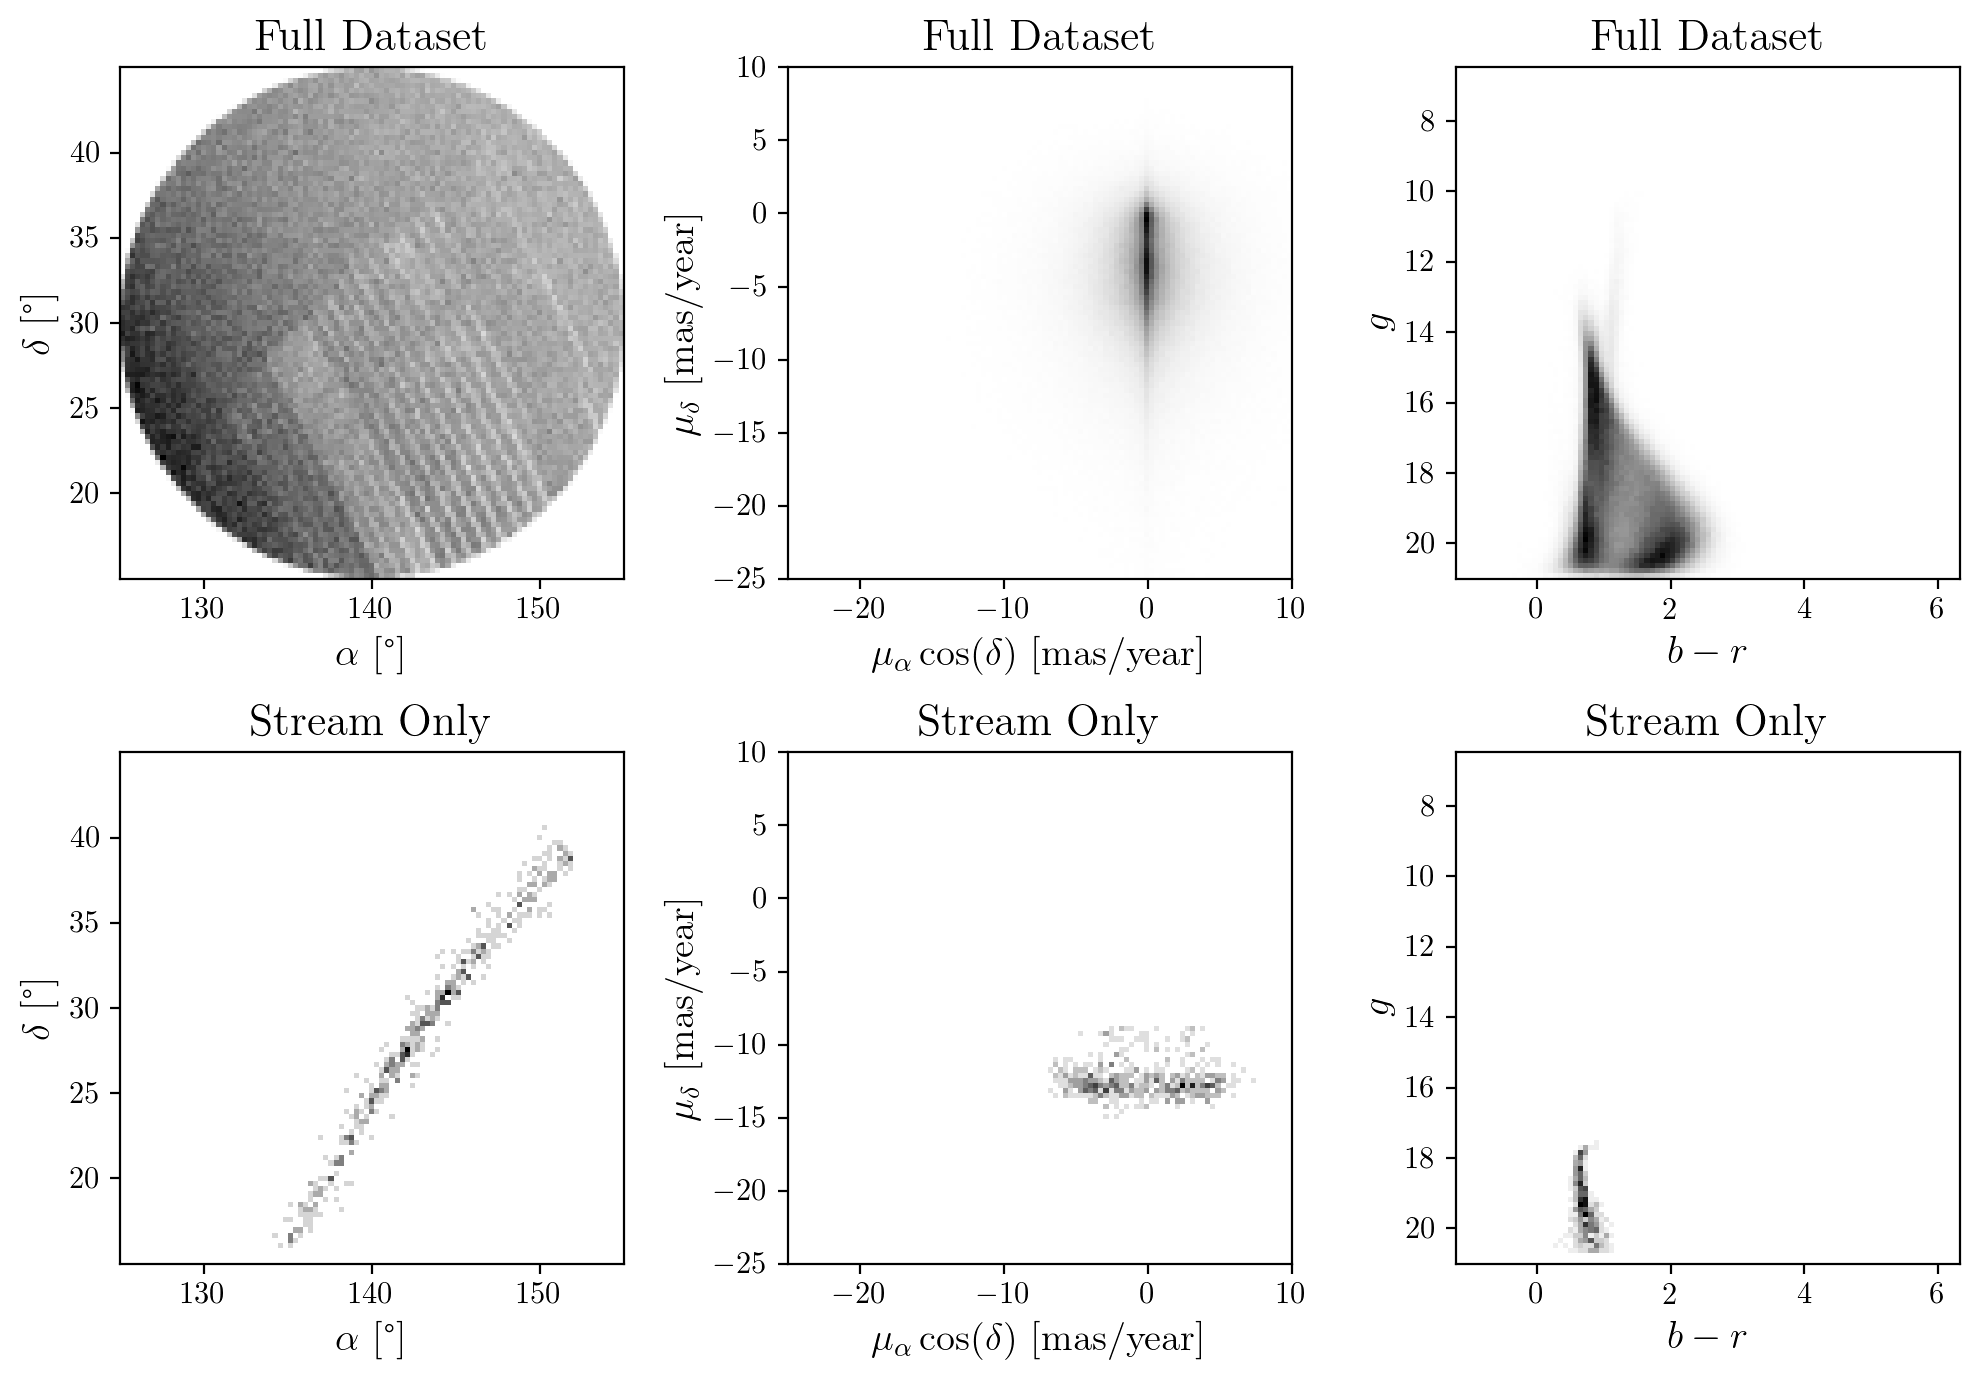

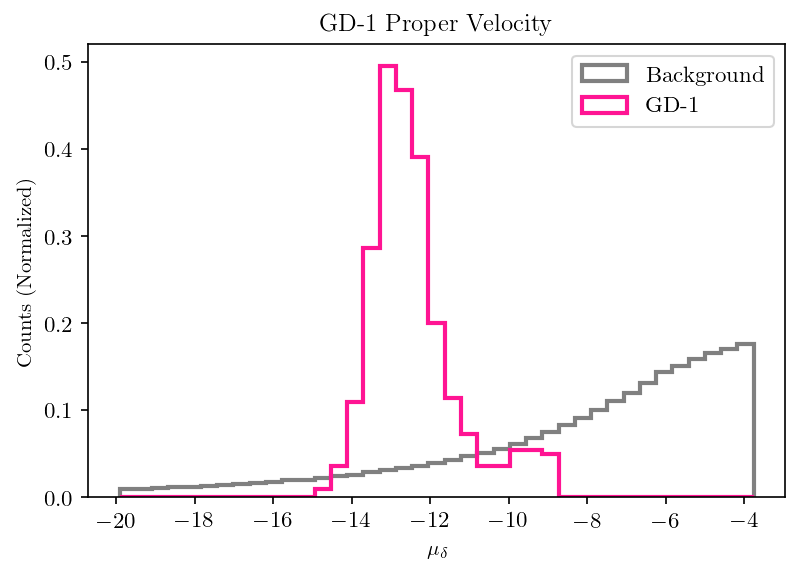

In [3]:
visualize_stream(df)

Sideband region: [-18.0,-9.5]
Signal region: [-15.0,-11.0]


/clusterfs/ml4hep/mpettee/GaiaCWoLa/notebooks/../python/functions.py:304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['label'] = np.where(((df_slice.μ_δ > sr_min) & (df_slice.μ_δ < sr_max)), 1, 0)


Total counts: SR = 70,835, SB = 71,692
Signal region has 470 stream and 70,365 bkg events (0.67%).
Sideband region has 40 stream and 71,652 bkg events (0.06%).
f_sig = 12.0X f_sideband.


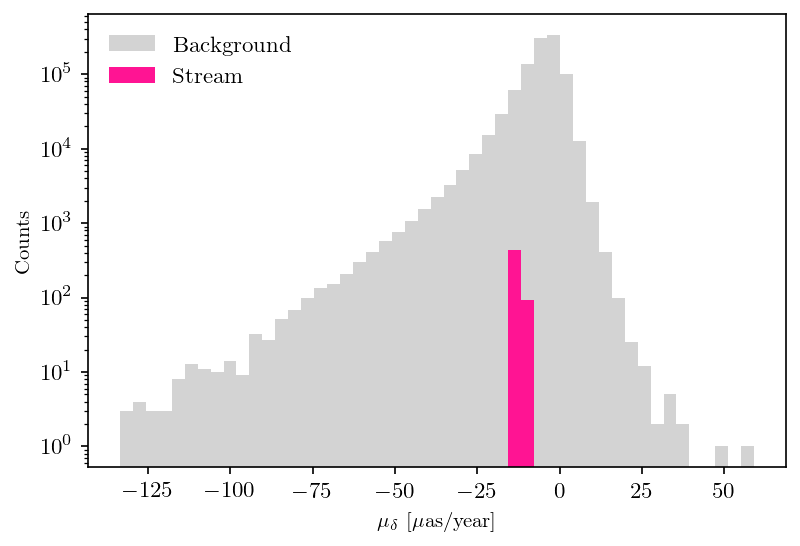

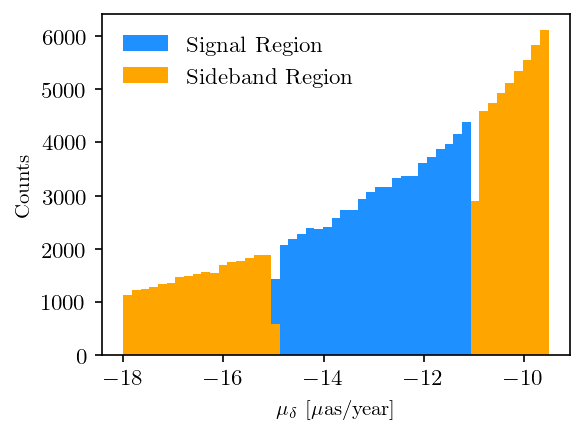

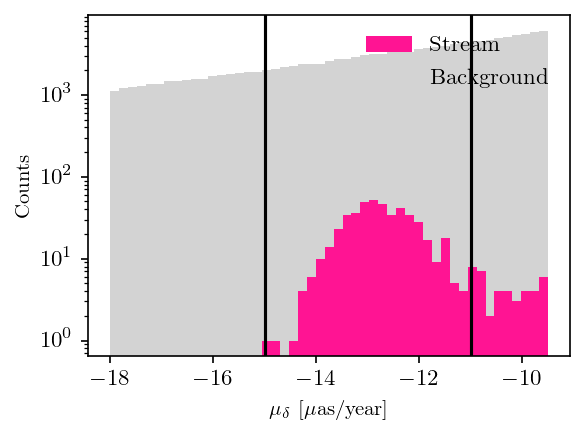

In [4]:
df = signal_sideband(df, stream = stream)

# Train

In [5]:
tf.keras.backend.clear_session()

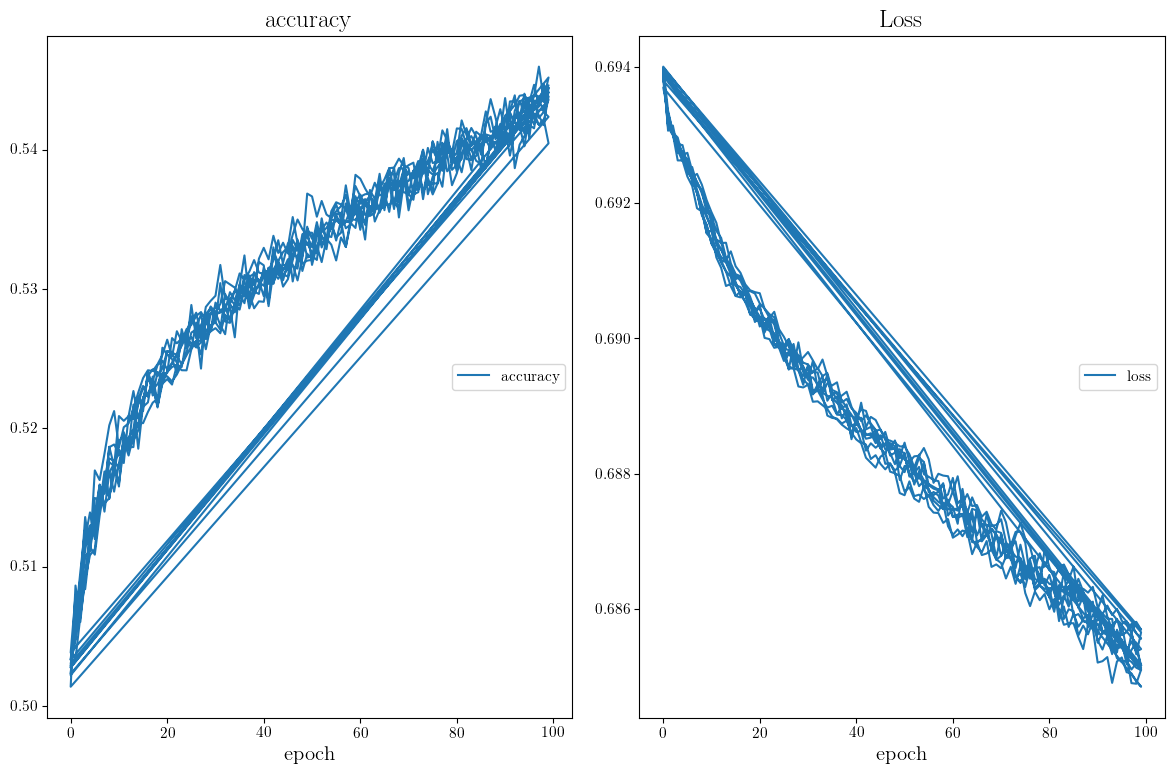

accuracy
	accuracy         	 (min:    0.501, max:    0.546, cur:    0.544)
Loss
	loss             	 (min:    0.685, max:    0.694, cur:    0.685)
446/446 [==============================] - 0s 841us/step


/clusterfs/ml4hep/mpettee/GaiaCWoLa/notebooks/../python/models.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["nn_score"] = model.predict(x_test)


Top 10 stars: Purity = 90.0% 
Top 20 stars: Purity = 85.0% 
Top 25 stars: Purity = 80.0% 
Top 50 stars: Purity = 74.0% 
Top 100 stars: Purity = 41.0% 
Fold purities: [64.0, 64.0, 76.0, 82.0, 70.0, 72.0, 74.0, 66.0, 70.0, 74.0]
Average purity = 71.2
Best k-fold = 3, with a purity of 82.00%.
Loading weights from k-fold 3...
Top 10 stars: Purity = 90.0% 
Top 20 stars: Purity = 95.0% 
Top 25 stars: Purity = 92.0% 
Top 50 stars: Purity = 82.0% 
Top 100 stars: Purity = 56.0% 
Top 10 stars: Purity = 100.0% 
Top 20 stars: Purity = 100.0% 
Top 25 stars: Purity = 100.0% 
Top 50 stars: Purity = 60.0% 
Top 100 stars: Purity = 30.0% 


Loop: 100%|██████████| 1/1 [36:30<00:00, 2190.30s/it]


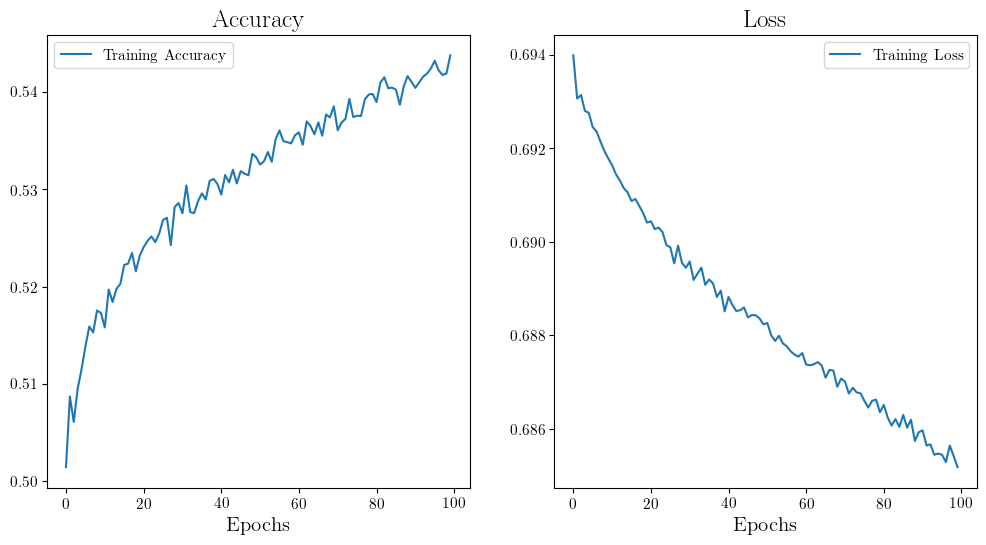

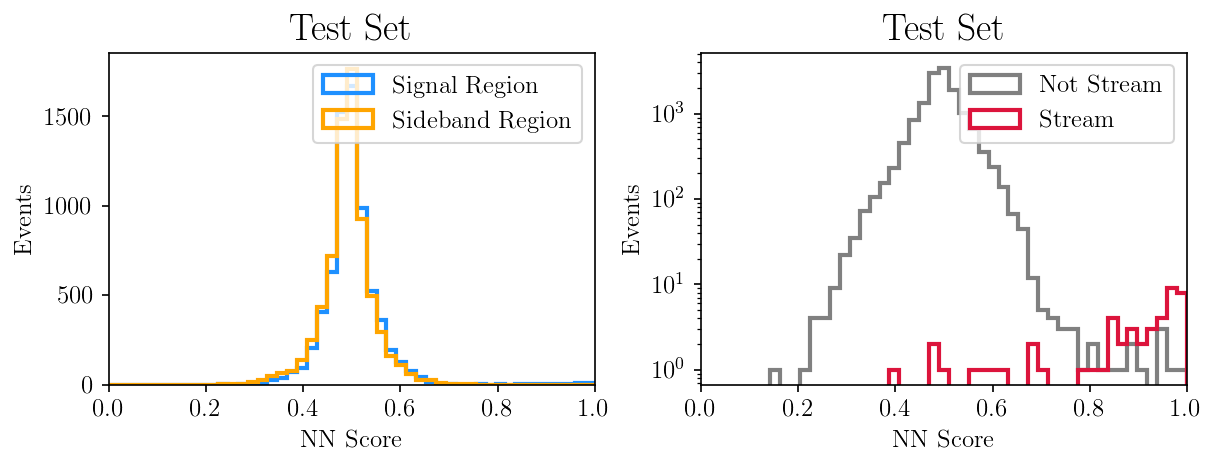

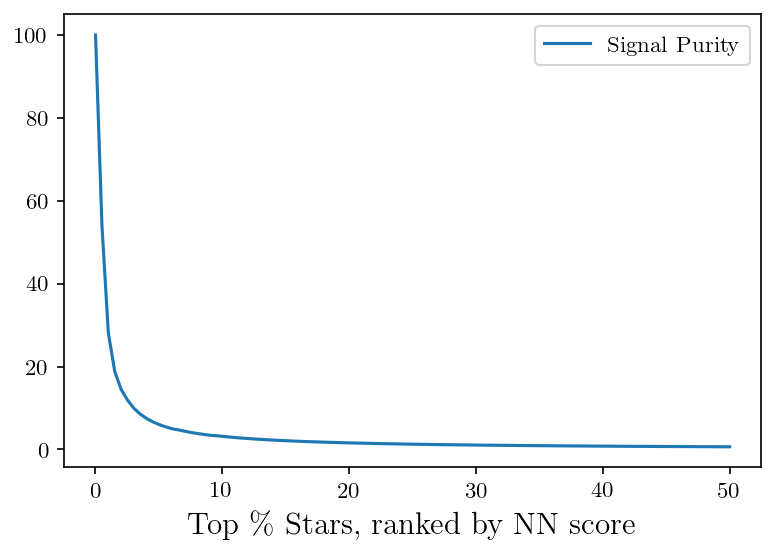

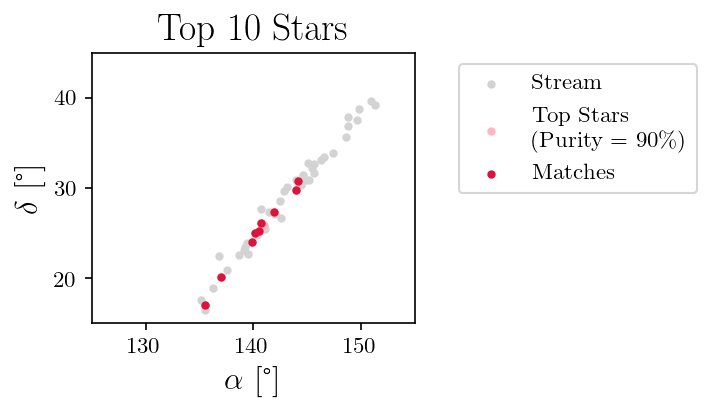

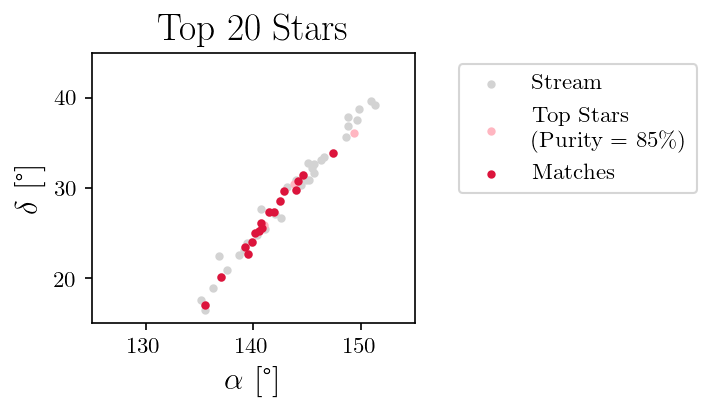

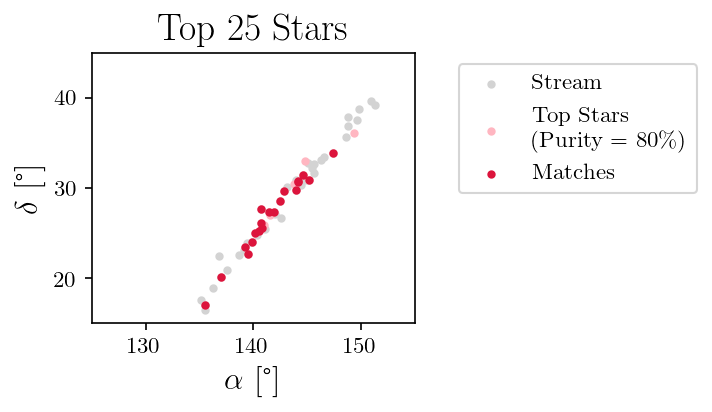

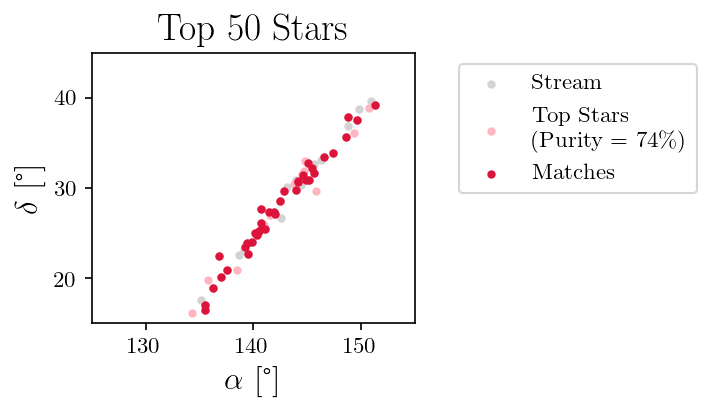

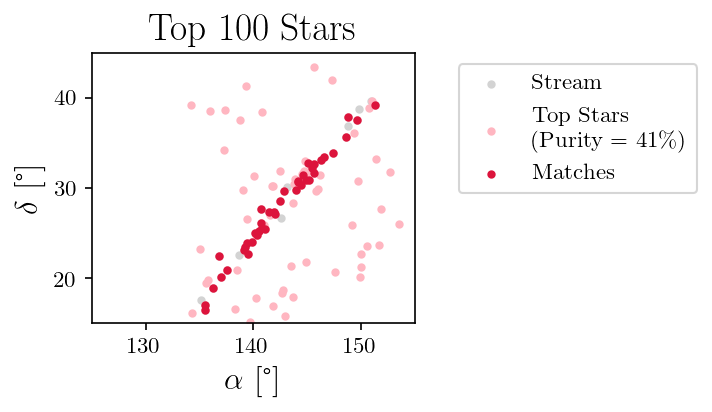

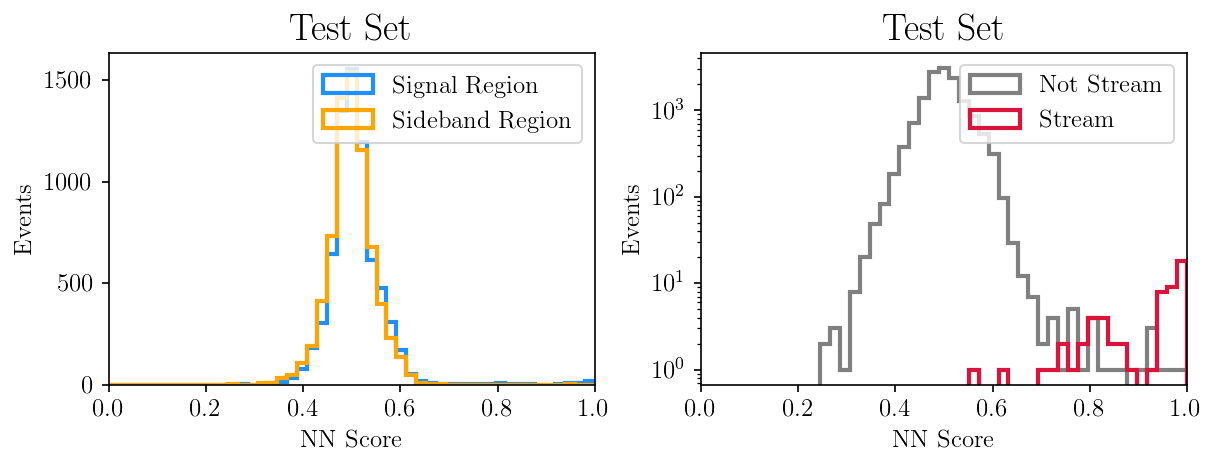

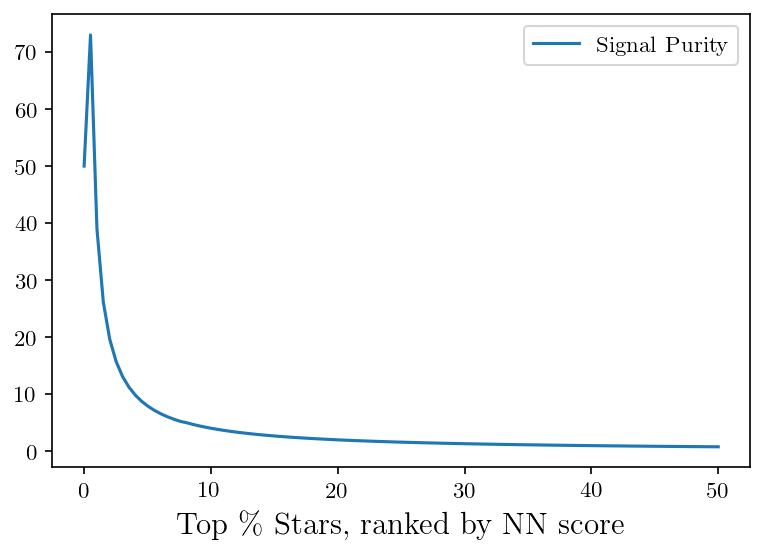

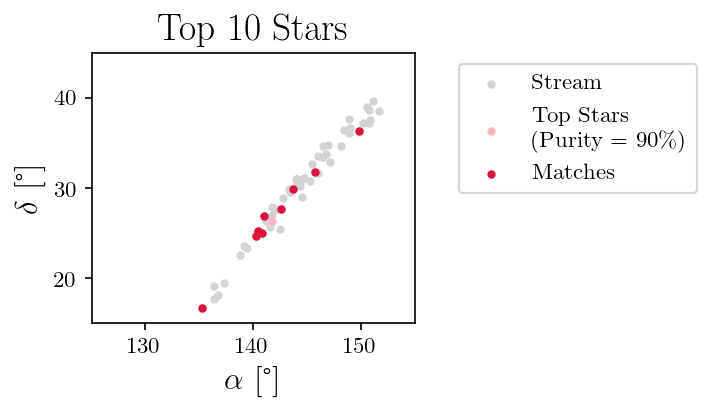

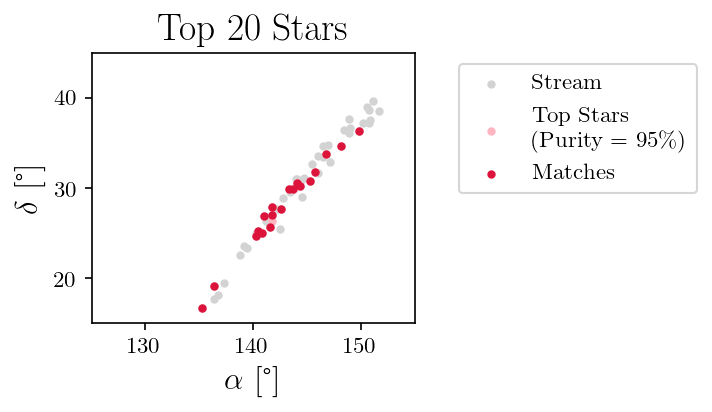

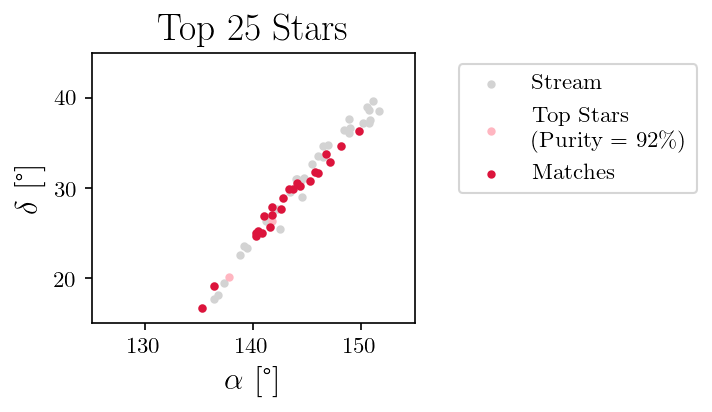

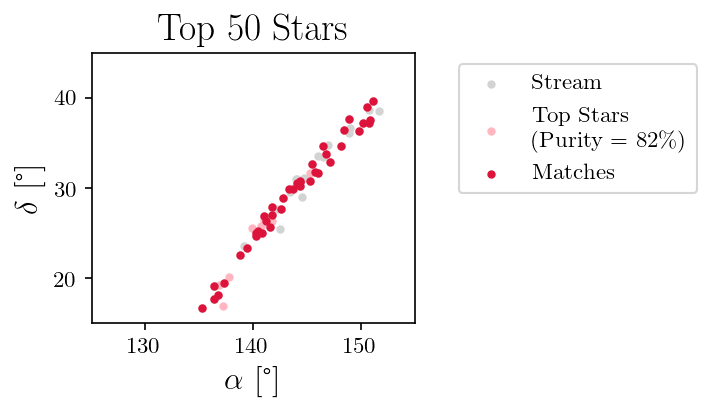

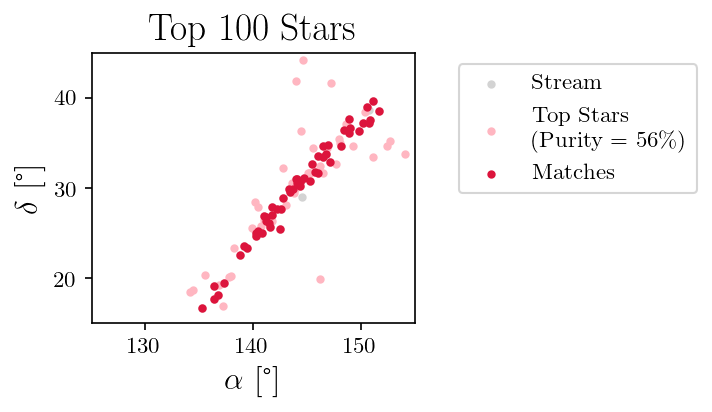

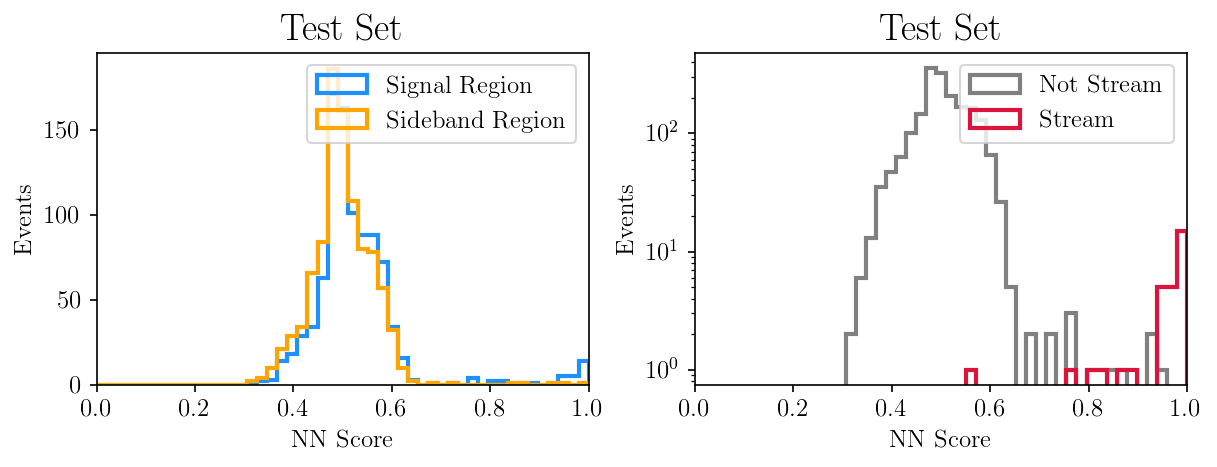

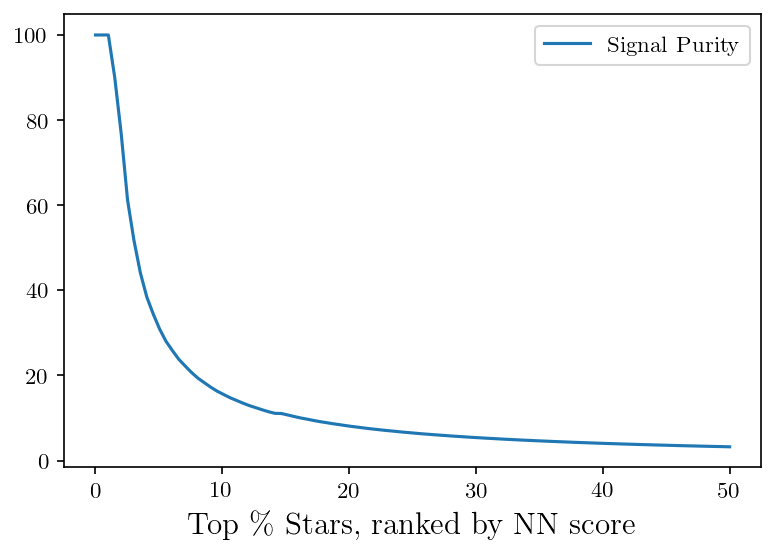

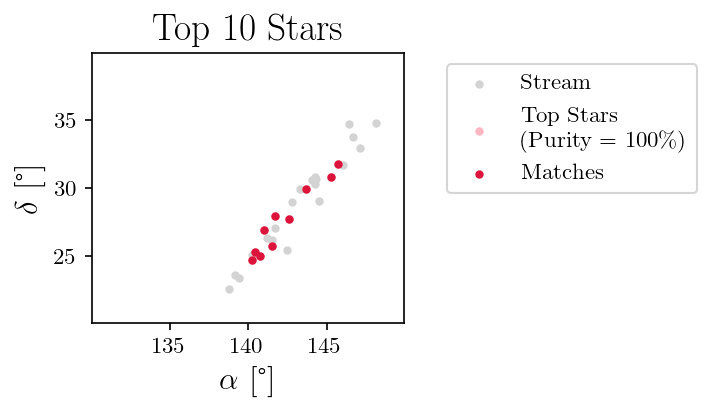

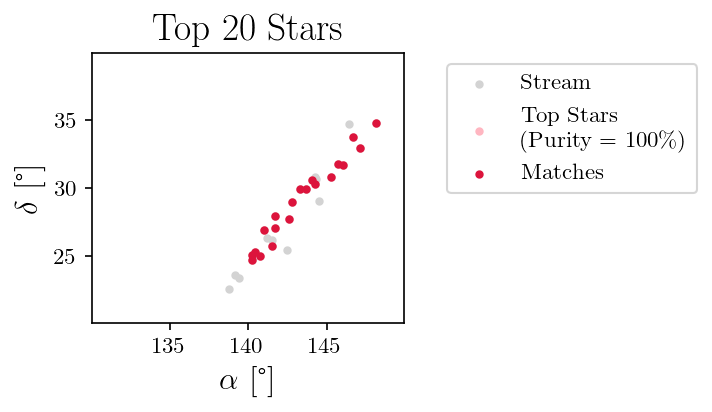

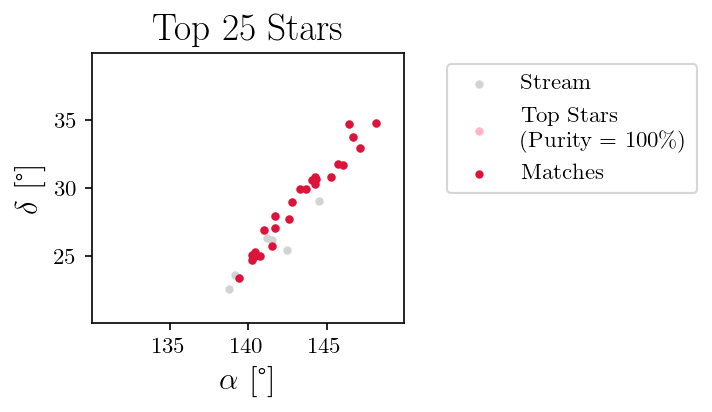

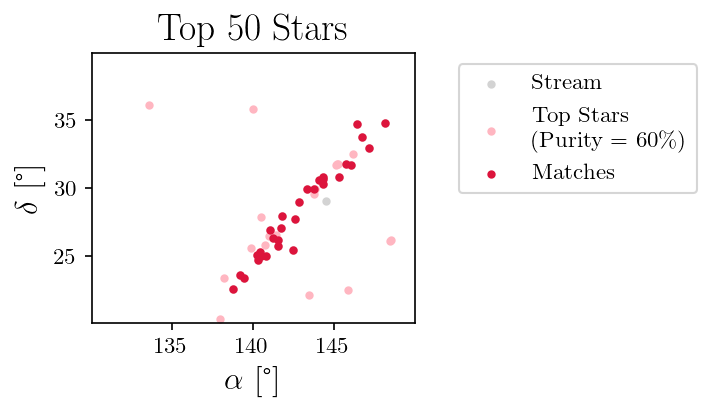

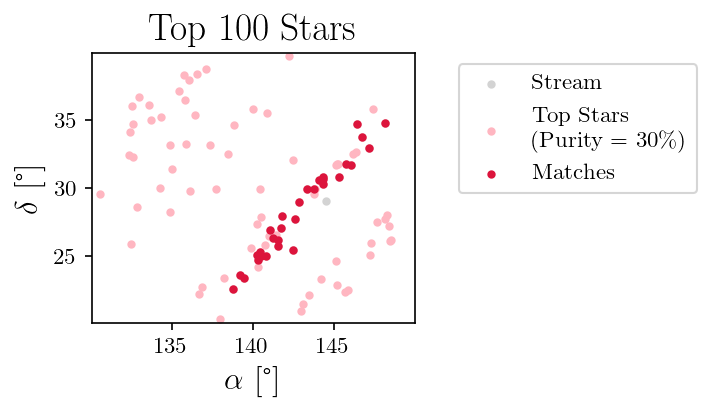

In [9]:
test = train(df, 
      n_folds = 10, 
      best_of_n_loops = 1,
      layer_size = 256, 
      batch_size = 1000, 
      dropout = 0.2, 
      epochs = 100, 
      patience = 20, 
      l2_reg = 0,
      save_folder = "../trained_models/gd1_bulk_patch_nfold10",
      other_callbacks=PlotLossesKeras(),
            )

In [11]:
# df_test = pd.read_hdf("gd1_bulk_patch_nfold10/before_fiducial_cuts/df_test.h5")
# plot_results(fiducial_cuts(df_test), 
#              save_folder = "gd1_bulk_patch_nfold10/after_fiducial_cuts"
#             )